# CLASIFICADOR DE GENERO

In [18]:
# Importo librerias
import numpy as np
import pandas as pd

In [19]:
# Leo los dataframes

# primero el dataframe con los nombres y el sexo
nombres_sexo = pd.read_csv('nombres-sexo.csv')

# segundo el dataframe con solo los nombres 
nombres = pd.read_csv('historico-nombres.csv', nrows = 100000)

In [20]:
nombres_sexo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 2 columns):
NOMBRE    716 non-null object
SEXO      716 non-null object
dtypes: object(2)
memory usage: 11.3+ KB


In [39]:
nombres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
nombre      100000 non-null object
cantidad    100000 non-null int64
anio        100000 non-null int64
1 nombre    100000 non-null object
2 nombre    100000 non-null object
3 nombre    100000 non-null object
1N cod      100000 non-null int64
2N cod      100000 non-null int64
3N cod      100000 non-null int64
sexo cod    100000 non-null int64
sexo        100000 non-null object
dtypes: int64(6), object(5)
memory usage: 8.4+ MB


In [22]:
# Primero hay que procesar un poco los datos
# Separo los distintos nombres de cada persona
# Es decir: Jose Ignacio tiene dos nombres, 1° nombre: Jose, 2°: Ignacio
# Pongo todo en minúscula para evitar que Jose sea distinto de JOSE

nombres_sexo['1 nombre'] = nombres_sexo['NOMBRE'].apply(lambda x: x.lower().split(" ")[0])
nombres_sexo['2 nombre'] = nombres_sexo['NOMBRE'].apply(lambda x: x.lower().split(" ")[1] if len(x.split(" ")) == 2 else " ")
nombres_sexo['3 nombre'] = nombres_sexo['NOMBRE'].apply(lambda x: x.lower().split(" ")[2] if len(x.split(" ")) == 3 else " ")


nombres['1 nombre'] = nombres['nombre'].apply(lambda x: x.lower().split(" ")[0])
nombres['2 nombre'] = nombres['nombre'].apply(lambda x: x.lower().split(" ")[1] if len(x.split(" ")) == 2 else " ")
nombres['3 nombre'] = nombres['nombre'].apply(lambda x: x.lower().split(" ")[2] if len(x.split(" ")) == 3 else " ")

# Parte 1 A)

### Quiero saber la cantidad de nombres distintos en el dataframe "nombres".

###### Para determinar el número de nombres distintos hago un append de las columnas 1 nombre, 2 nombre y 3 nombre del dataframe y luego uso el método unique() para que no hayan nombres repetidos, de esta forma obtengo una lista de todos los nombres en dataframe. Luego usando len() determino el número de nombres total.

In [16]:
num_nombres = len(nombres['1 nombre'].append(nombres['2 nombre'].append(nombres['3 nombre'])).unique())

print('El número de nombres en el dataframe es {}'.format(num_nombres))

El número de nombres en el dataframe es 12322


# Parte 1 B)

### Quiero construir un clasificador que determine el sexo de una persona dado el nombre.

###### Para construir el clasficador voy a usar el dataframe "nombres_sexo" en el cual hay una lista de 716 nombres con su respectivo género y usar el arbol de decisión de la libreria scikir learn de python. Los pasos a seguir son los siguientes:

###### 1) Con la separación de los nombres que forman el nombre completo de cada persona, creo una lista de todos los nombres que tengo que los dos dataframes para luego usar LabelEncoder de sklearn y codificar los nombres en números.

###### 2) Una vez realizada la codificación de los nombres, paso a separar los datos conocidos, es decir los datos del dataframe "nomrbes_sexo", en train_data y test_data para entrenar y evaluar el modelo respectivamente.

###### 3) Por último, entreno mi modelo y lo evalúo usando confusion_matrix. 

In [23]:
# Armo una pandas series con los nombres y uso el metodo unique() para que no hayan nombres repetidos
# Si no me equivoco distingue los nombres con y sin tilde

todos_nombres = nombres_sexo['1 nombre'].append(nombres_sexo['2 nombre'].append(nombres_sexo['3 nombre']))

todos_nombres = todos_nombres.append(nombres['1 nombre'].append(nombres['2 nombre'].append(nombres['3 nombre']))).unique()


In [25]:
# Codifico los nombres usando LabelEncoder de sklearn

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

# Primero hago un fit con los nombres, despues transformo las columnas del data frame
LE.fit(todos_nombres)

# Ahora transformo las columnas con los nombres

nombres_sexo['1N cod'] = LE.transform(nombres_sexo['1 nombre'])
nombres_sexo['2N cod'] = LE.transform(nombres_sexo['2 nombre'])
nombres_sexo['3N cod'] = LE.transform(nombres_sexo['3 nombre'])

nombres['1N cod'] = LE.transform(nombres['1 nombre'])
nombres['2N cod'] = LE.transform(nombres['2 nombre'])
nombres['3N cod'] = LE.transform(nombres['3 nombre'])

nombres_sexo['sexo cod'] = LE.fit_transform(nombres_sexo['SEXO'])

In [26]:
# Separo los datos en train y test data
from sklearn.model_selection import train_test_split

X = nombres_sexo[['1N cod', '2N cod', '3N cod']]
y = LE.fit_transform(nombres_sexo['SEXO']) # Aca codifico el sexo de cada persona

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
# Entrenamos el modelo, ahora uso DecisionTree
from sklearn.tree import DecisionTreeClassifier

DTREE = DecisionTreeClassifier()

# Ajustamos el modelo con train data
DTREE.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
# Hacemos una prediccion con los datos de test
y_pred = DTREE.predict(X_test)

In [32]:
# Ahora usamos confusion_matrix y classification_report para evaluar el modelo

from sklearn.metrics import confusion_matrix, classification_report

print('Confusion_matrix:\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification_report:\n')
print(classification_report(y_test, y_pred))

Confusion_matrix:

[[82 10]
 [22 65]]


Classification_report:

             precision    recall  f1-score   support

          0       0.79      0.89      0.84        92
          1       0.87      0.75      0.80        87

avg / total       0.83      0.82      0.82       179



## Conclusión:

###### El modelo parece andar relativamente, tiene un gran porcentaje de acierto en el sexo sabiendo el nombre de las personas, pero aún asi tiene fallas, hay varios nombres a los cuales no le determina bien el genero. Ésto puede deberse a que el conjunto de datos que usé para entrenar mi modelo es muy chico.

# Parte 1 C)

### Ahora aplicamos el clasificador DecisionTree para clasificar los datos desconocidos del data frame "nombres".

###### Para esta última parte solo tengo que evaluar mi modelo con los datos que no son conocidos. Al final grafico la cantidad de nombres de hombres de mujeres para cada año.

In [33]:
nombres['sexo cod'] = DTREE.predict(nombres[['1N cod', '2N cod', '3N cod']])

In [34]:
nombres

,nombre,cantidad,anio,1 nombre,2 nombre,3 nombre,1N cod,2N cod,3N cod,sexo cod
0,Maria,314,1922,maria,,,8116,1,1,0
1,Rosa,203,1922,rosa,,,10416,1,1,0
2,Jose,163,1922,jose,,,7080,1,1,1
3,Maria Luisa,127,1922,maria,luisa,,8116,7860,1,0
4,Carmen,117,1922,carmen,,,2179,1,1,0
5,Ana,113,1922,ana,,,805,1,1,0
6,Maria Elena,112,1922,maria,elena,,8116,3881,1,0
7,Juana,111,1922,juana,,,7114,1,1,0
8,Maria Esther,109,1922,maria,esther,,8116,4685,1,0
9,Antonio,103,1922,antonio,,,1012,1,1,0


In [35]:
nombres['sexo'] = LE.inverse_transform(nombres['sexo cod'])

In [36]:
nombres.head()

,nombre,cantidad,anio,1 nombre,2 nombre,3 nombre,1N cod,2N cod,3N cod,sexo cod,sexo
0,Maria,314,1922,maria,,,8116,1,1,0,F
1,Rosa,203,1922,rosa,,,10416,1,1,0,F
2,Jose,163,1922,jose,,,7080,1,1,1,M
3,Maria Luisa,127,1922,maria,luisa,,8116,7860,1,0,F
4,Carmen,117,1922,carmen,,,2179,1,1,0,F


### Ahora hago los graficos

In [37]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

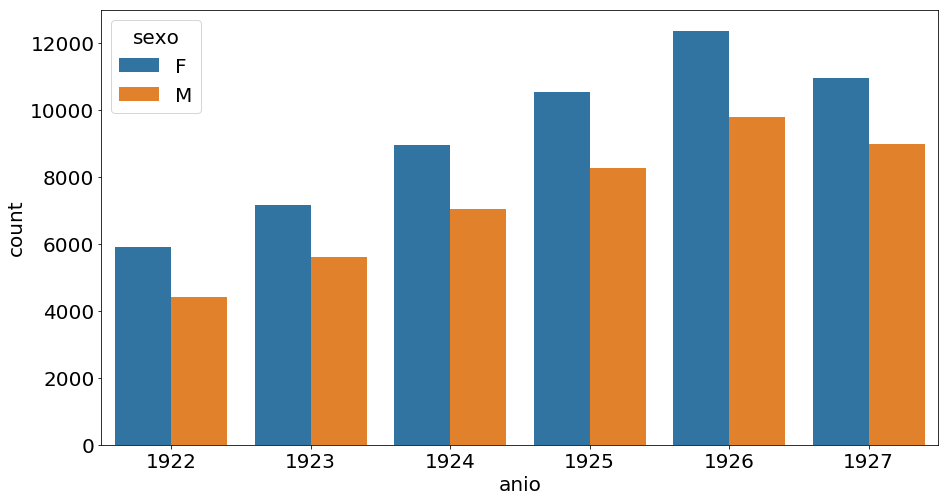

In [38]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

plt.figure(figsize = (15,8))
sns.countplot(x = nombres['anio'], hue = nombres['sexo'])

plt.savefig('Basic.pdf', bbox_inches='tight')